<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/main/IA_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Despu√©s de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
clientes=pd.read_csv(url_clientes)

In [4]:
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [5]:
ventas=pd.read_csv(url_ventas)

In [6]:
ventas.tail()

ID_compra       fecha horario            categoria  precio_unitario  \
6164       6141  2023-12-31   17:49    Electrodom√©sticos           1509.9   
6165       6148  2023-12-31   23:02  Papeler√≠a y oficina             14.0   
6166       6123  2023-12-31   21:25  Alimentos y bebidas             77.9   
6167       6147  2023-12-31   21:38               Libros            142.9   
6168       6122  2023-12-31   22:11    Belleza e higiene             89.9   

      cantidad   envio         metodo_pago  
6164         5  377.48  Tarjeta de Cr√©dito  
6165         2    3.36       Transferencia  
6166         1    7.79  Tarjeta de Cr√©dito  
6167         4   17.15  Tarjeta de Cr√©dito  
6168         5   13.48  Tarjeta de Cr√©dito

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

In [7]:
# Informaci√≥n general sobre el DataFrame (tipos de datos, no nulos, etc.)
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [8]:
# Estad√≠sticas descriptivas para columnas num√©ricas
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [9]:
# Estad√≠sticas para columnas categ√≥ricas
clientes.describe(include=['object', 'category', 'bool'])

ciudad            estado  region sexo_biologico cashback
count               6169              6169    6169           6169     6169
unique                94                28       9              2        2
top     Ciudad de M√©xico  Estado de M√©xico  Centro       Femenino       No
freq                 458              1042    1540           3371     3557

In [10]:
# Distribuci√≥n del sexo biol√≥gico
clientes['sexo_biologico'].value_counts()

sexo_biologico
Femenino     3371
Masculino    2798
Name: count, dtype: int64

In [11]:
# Porcentaje de participaci√≥n en el programa de cashback
clientes['cashback'].value_counts()

cashback
No    3557
S√≠    2612
Name: count, dtype: int64

In [12]:
# Porcentaje de participaci√≥n en el programa de cashback
clientes['cashback'].value_counts(normalize=True)

cashback
No    0.576593
S√≠    0.423407
Name: proportion, dtype: float64

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "ventas" y algunos de sus atributos.

In [13]:
# Informaci√≥n general sobre el DataFrame
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [14]:
ventas['fecha'] = pd.to_datetime(ventas['fecha'],format='%Y-%m-%d')

In [15]:
# Estad√≠sticas descriptivas para columnas num√©ricas
ventas.describe()

ID_compra                          fecha  precio_unitario  \
count  6169.000000                           6169      6169.000000   
mean   3085.000000  2023-08-20 00:12:22.292105984       873.234738   
min       1.000000            2023-01-03 00:00:00         2.900000   
25%    1543.000000            2023-05-30 00:00:00        44.900000   
50%    3085.000000            2023-08-31 00:00:00        93.900000   
75%    4627.000000            2023-11-23 00:00:00       221.900000   
max    6169.000000            2023-12-31 00:00:00      8000.000000   
std    1780.981237                            NaN      1852.064342   

          cantidad        envio  
count  6169.000000  6169.000000  
mean      3.004863   119.233832  
min       1.000000     0.000000  
25%       2.000000     0.320000  
50%       3.000000     7.550000  
75%       4.000000    29.240000  
max       5.000000  4521.540000  
std       1.420725   366.149225

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [16]:
# Unir los DataFrames por la columna 'ID_compra'
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

In [17]:
# Reorganizar las columnas en el orden deseado
df = df[['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario', 'cantidad', 'envio',
                      'metodo_pago', 'ID_cliente', 'edad', 'sexo_biologico', 'ciudad', 'estado', 'region', 'cashback', 'nota']]

In [18]:
# Mostrar las primeras filas del data frame
df.head()

ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota  
0        Hermosillo            Sonora      Noroeste       S√≠    10  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7  
3          Veracruz          Veracruz         Golfo       S√≠     9  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

##**Sugerencias de chat gpt**

---

### üìà **1. An√°lisis de facturaci√≥n a lo largo del tiempo**

> Objetivo: entender c√≥mo evoluciona el ingreso total.

* **Facturaci√≥n mensual**
  ‚Üí `Line plot` de la suma de ventas mensuales (`precio_unitario * cantidad`) por mes (`df['fecha'].dt.to_period('M')`).

* **Facturaci√≥n diaria**
  ‚Üí `Line plot` de ingresos por d√≠a: √∫til para identificar picos (promos, campa√±as, etc.).

* **Facturaci√≥n por categor√≠a a lo largo del a√±o**
  ‚Üí `Stacked area plot` o `multiple line plot` por mes y categor√≠a.

* **Distribuci√≥n horaria de las ventas**
  ‚Üí `Bar plot` de la suma de ventas por franja horaria (`horario` convertido a horas).

---

### üßë‚Äçüíº **2. Perfil del cliente**

> Objetivo: comprender qui√©nes son los clientes.

* **Distribuci√≥n de edad de los clientes**
  ‚Üí `Histogram` o `boxplot` de la columna `edad`.

* **Sexo biol√≥gico vs. volumen de compras**
  ‚Üí `Bar plot` de cantidad total vendida (o ingresos) por `sexo_biologico`.

* **Participaci√≥n en el cashback**
  ‚Üí `Pie chart` o `bar plot` de proporci√≥n de clientes con y sin `cashback`.

* **Nota promedio por perfil de cliente**
  ‚Üí `Boxplot` de `nota` agrupado por `sexo_biologico`, `cashback`, o grupos de `edad`.

---

### üåç **3. An√°lisis geogr√°fico**

> Objetivo: identificar zonas clave para el negocio.

* **Ingresos por regi√≥n/estado**
  ‚Üí `Bar plot` o `mapa de calor` por `region` o `estado` con suma de ventas.

* **Cantidad de compras por ciudad**
  ‚Üí `Bar plot` de las ciudades con mayor volumen.

---

### üõí **4. An√°lisis de productos y categor√≠as**

> Objetivo: entender qu√© se vende y c√≥mo.

* **Top categor√≠as por ingresos**
  ‚Üí `Bar plot` con suma de `precio_unitario * cantidad` por `categoria`.

* **Categor√≠as m√°s vendidas (en cantidad)**
  ‚Üí `Bar plot` con suma de `cantidad` por `categoria`.

* **Relaci√≥n entre cantidad vendida y evaluaci√≥n (nota)**
  ‚Üí `Scatter plot` o `boxplot` de `nota` por categor√≠a.

---

### üí≥ **5. M√©todos de pago**

> Objetivo: analizar preferencias de los clientes al pagar.

* **Distribuci√≥n del uso de m√©todos de pago**
  ‚Üí `Bar plot` de frecuencia de cada `metodo_pago`.

* **Ticket promedio por m√©todo de pago**
  ‚Üí `Bar plot` de `(precio_unitario * cantidad + envio)` promedio por m√©todo de pago.

---

### üîÅ **6. Relaci√≥n entre cashback y comportamiento de compra**

> Objetivo: medir el impacto del programa de cashback.

* **Ingresos generados por clientes con vs sin cashback**
  ‚Üí `Bar plot` comparativo.

* **Nota promedio de clientes con y sin cashback**
  ‚Üí `Boxplot` o `bar plot`.

* **Ticket promedio con y sin cashback**
  ‚Üí Mismo enfoque.

---

### üìä **7. M√©tricas generales en tarjetas resumen (dashboards)**

> Ideal para presentaci√≥n ejecutiva.

* Facturaci√≥n total
* Total de compras
* Ticket promedio
* Clientes √∫nicos
* Porcentaje de clientes con cashback
* Nota promedio

---

¬øQuieres que te ayude a construir algunas de estas visualizaciones usando `matplotlib`, `seaborn` o `plotly`? Solo dime cu√°l quieres comenzar.


##**Desaf√≠o Zoop Pay**

In [19]:
import pandas as pd

#Cargar urls
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"


# Cargar los datasets
clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay=pd.read_csv(url_zoop_pay)


In [20]:
clientes.columns

Index(['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'region', 'edad',
       'sexo_biologico', 'cashback', 'nota'],
      dtype='object')

In [21]:
ventas.columns

Index(['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
       'cantidad', 'envio', 'metodo_pago'],
      dtype='object')

In [22]:
zoop_pay.columns

Index(['ID_cliente', 'zoop_pay'], dtype='object')

In [23]:
# Uniendo las bases "ventas" y "clientes" usando la columna "ID_compra" como clave
df = pd.merge(ventas, clientes, on="ID_compra")

# Organizando las columnas en la secuencia especificada
columnas_ordenadas = ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad", "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]

df = df[columnas_ordenadas]

# Mostrando las primeras filas del DataFrame resultante para verificaci√≥n
df.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  ID_cliente  edad  \
0           4457.9         4  713.26              Paypal        6149    30   
1            115.9         1    0.00       Transferencia        9491    36   
2             68.9         2   13.78  Tarjeta de Cr√©dito        5288    39   
3             80.9         5   40.45       Transferencia        9679    35   
4            165.0         4    0.00       Transferencia        1380    50   

  sexo_biologico            ciudad            estado        region cashback  \
0      Masculino        Hermosillo            Sonora      Noroeste       S√≠   
1      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠   
2       Femenino    Aguascalientes    Aguascalientes  Centro-Norte       No   
3      Masculino          Veracruz          Veracruz         Golfo       S√≠   
4      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No   

   nota  
0    10  
1     8  
2     7  
3     9  
4     9

In [24]:
# Uniendo el DataFrame df con la base zoop_pay utilizando la columna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando la columna "fecha" al formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

# Mostrando las primeras filas del DataFrame resultante para verificaci√≥n
df.head()

ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota zoop_pay  
0        Hermosillo            Sonora      Noroeste       S√≠    10       No  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8       S√≠  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7       No  
3          Veracruz          Veracruz         Golfo       S√≠     9       S√≠  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9       No

# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

In [26]:
metodos_de_pago

metodo_pago  cantidad
0  Tarjeta de Cr√©dito      2851
1       Transferencia      2244
2   Tarjeta de D√©bito       547
3              Paypal       527

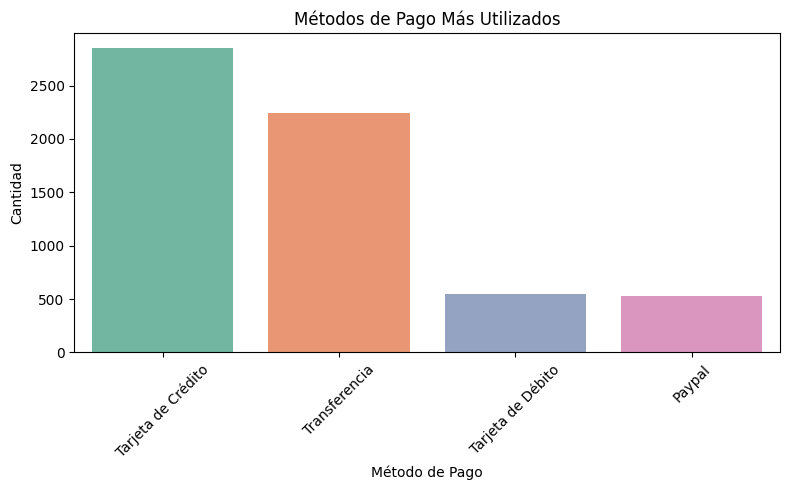

In [27]:
# 2. Crear el gr√°fico
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Set2')

# Personalizar el gr√°fico
plt.title('M√©todos de Pago M√°s Utilizados')
plt.xlabel('M√©todo de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la columna de facturaci√≥n por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_por_categoria = df.groupby('categoria')['facturacion'].sum().sort_values()

# 3. Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_por_categoria.values, y=facturacion_por_categoria.index, palette='viridis')

# Personalizaci√≥n del gr√°fico
plt.title('Facturaci√≥n por Categor√≠a de Producto')
plt.xlabel('Facturaci√≥n en MXN')
plt.ylabel('Categor√≠a')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para traducir los nombres de los meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Asegurarse de que 'fecha' sea datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer a√±o y mes para agrupar
df['a√±o_mes'] = df['fecha'].dt.to_period('M')

# Agrupar por a√±o y mes y sumar la facturaci√≥n
ventas_mensuales = df.groupby('a√±o_mes')['facturacion'].sum().reset_index()

# Convertir 'a√±o_mes' a datetime para ordenar y graficar
ventas_mensuales['fecha'] = ventas_mensuales['a√±o_mes'].dt.to_timestamp()

# Extraer nombre del mes traducido
ventas_mensuales['mes'] = ventas_mensuales['fecha'].dt.month_name().map(meses)

# Crear el gr√°fico
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o')

# Personalizar gr√°fico
plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n Total')
plt.grid(True)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


In [30]:
df.head(10)

ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   
5          2 2023-01-03   18:42                 Electr√≥nicos           5747.9   
6          3 2023-01-03   23:47          Alimentos y bebidas             84.9   
7          1 2023-01-03   00:13            Electrodom√©sticos           3465.9   
8          7 2023-01-03   17:40                       Libros             75.9   
9         11 2023-01-04   21:50                  Casa y aseo             13.9   

   cantidad    envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4   713.26              Paypal        6149    30      Masculino   
1         1     0.00       Transferencia        9491    36      Masculino   
2         2    13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5    40.45       Transferencia        9679    35      Masculino   
4         4     0.00       Transferencia        1380    50      Masculino   
5         5  1724.37       Transferencia        2771    45      Masculino   
6         5     0.00  Tarjeta de Cr√©dito        1960    35       Femenino   
7         1   138.64       Transferencia        5146    43       Femenino   
8         5    18.98  Tarjeta de Cr√©dito        3106    35      Masculino   
9         5     3.48       Transferencia        8765    32       Femenino   

               ciudad            estado        region cashback  nota zoop_pay  \
0          Hermosillo            Sonora      Noroeste       S√≠    10       No   
1    Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8       S√≠   
2      Aguascalientes    Aguascalientes  Centro-Norte       No     7       No   
3            Veracruz          Veracruz         Golfo       S√≠     9       S√≠   
4    Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9       No   
5           Chihuahua         Chihuahua      Noroeste       No    10       No   
6    Ciudad de M√©xico  Ciudad de M√©xico        Centro       No    10       No   
7          Monterrey         Nuevo Le√≥n       Noreste       No     8       No   
8  Puebla de Zaragoza            Puebla    Centro-Sur       No    10       No   
9    Oaxaca de Ju√°rez            Oaxaca           Sur       S√≠     9       No   

   facturacion  a√±o_mes  
0     18544.86  2023-01  
1       115.90  2023-01  
2       151.58  2023-01  
3       444.95  2023-01  
4       660.00  2023-01  
5     30463.87  2023-01  
6       424.50  2023-01  
7      3604.54  2023-01  
8       398.48  2023-01  
9        72.98  2023-01

#Desaf√≠o: generando visualizaciones con respecto a la localizaci√≥n

Desaf√≠o 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la facturaci√≥n de las ventas por regi√≥n. Recuerda que aqu√≠ la facturaci√≥n se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de env√≠o.

Tenemos un Data Frame llamado df y queremos contruir un gr√°fico para visualizar
la facturaci√≥n de ventas por regi√≥n.

La facturaci√≥n se calcula multiplicando el 'precio_unitario' por la 'cantidad'  y sumando el costo de 'envio'.

In [31]:

# 1. Calcular la facturaci√≥n
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por regi√≥n
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# 3. Crear el gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=facturacion_por_region, x='region', y='facturacion', palette='viridis')

# 4. Personalizaci√≥n
plt.title('Facturaci√≥n Total por Regi√≥n')
plt.xlabel('Regi√≥n')
plt.ylabel('Facturaci√≥n Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Opinion del instructor prompt:
Tenemos un DataFrame llamado "df" y queremos construir una visualizaci√≥n de gr√°fico de columnas que presente la facturaci√≥n por regi√≥n de Zoop.
En "df", tenemos las siguientes columnas:
- region: regi√≥n del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del env√≠o a ser pago en el total de la compra.
Deseamos crear una visualizaci√≥n que presente la facturaci√≥n de cada regi√≥n, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el env√≠o.
Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

In [32]:
# 1. Calcular la facturaci√≥n para cada fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por regi√≥n y sumar la facturaci√≥n
facturacion_region = df.groupby('region')['facturacion'].sum().reset_index()

# 3. Crear gr√°fico de columnas
plt.figure(figsize=(10, 6))
sns.barplot(data=facturacion_region, x='region', y='facturacion', palette='viridis')

# 4. Personalizaci√≥n del gr√°fico
plt.title('Facturaci√≥n Total por Regi√≥n - Zoop')
plt.xlabel('Regi√≥n')
plt.ylabel('Facturaci√≥n Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df.head(1)

ID_compra      fecha horario     categoria  precio_unitario  cantidad  \
0          6 2023-01-03   20:40  Electr√≥nicos           4457.9         4   

    envio metodo_pago  ID_cliente  edad sexo_biologico      ciudad  estado  \
0  713.26      Paypal        6149    30      Masculino  Hermosillo  Sonora   

     region cashback  nota zoop_pay  facturacion  a√±o_mes  
0  Noroeste       S√≠    10       No     18544.86  2023-01

Desaf√≠o 2:

Zoop quiere realizar una campa√±a en los estados de M√©xico y Puebla, por lo que necesita conocer el perfil de su p√∫blico seg√∫n el sexo biol√≥gico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composici√≥n del p√∫blico por sexo biol√≥gico en los estados de M√©xico y Puebla. Recuerda pedir que agrupe o apile los datos para la presentaci√≥n.

In [34]:
df['estado'].unique()

array(['Sonora', 'Ciudad de M√©xico', 'Aguascalientes', 'Veracruz',
       'Chihuahua', 'Nuevo Le√≥n', 'Puebla', 'Oaxaca', 'Sinaloa',
       'Coahuila', 'Baja California', 'Estado de M√©xico', 'Morelos',
       'Guanajuato', 'Jalisco', 'Durango', 'Yucat√°n', 'Quer√©taro',
       'Quintana Roo', 'Tamaulipas', 'Hidalgo', 'Nayarit', 'Zacatecas',
       'San Luis Potos√≠', 'Tabasco', 'Chiapas', 'Michoac√°n', 'Campeche'],
      dtype=object)

Tenemos un Data Frame llamado df y queremos construir un gr√°fico para visualizar el 'sexo_biologico' para conocer el perfil del p√∫blico en los estados de 'Ciudad de M√©xico', 'Estado de M√©xico', 'Puebla', 'Campeche' y 'Yucatan'.

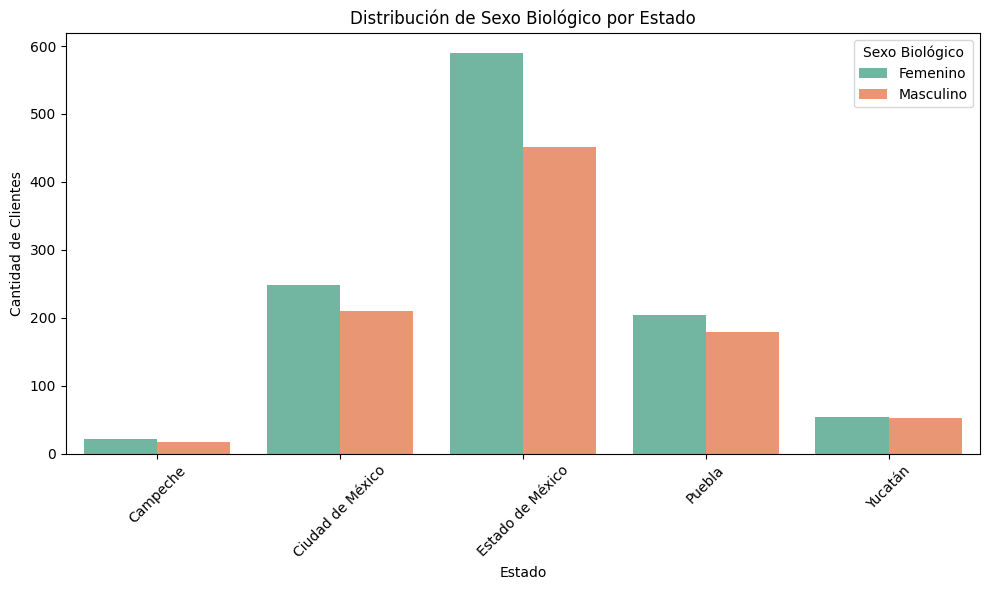

In [35]:
# 1. Definir los estados de inter√©s
estados_interes = ['Ciudad de M√©xico', 'Estado de M√©xico', 'Puebla', 'Campeche', 'Yucat√°n']

# 2. Filtrar el DataFrame
df_filtrado = df[df['estado'].isin(estados_interes)]

# 3. Agrupar y contar
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().reset_index(name='cantidad')

# 4. Crear gr√°fico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo, x='estado', y='cantidad', hue='sexo_biologico', palette='Set2')

# 5. Personalizaci√≥n
plt.title('Distribuci√≥n de Sexo Biol√≥gico por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Sexo Biol√≥gico')
plt.tight_layout()
plt.show()

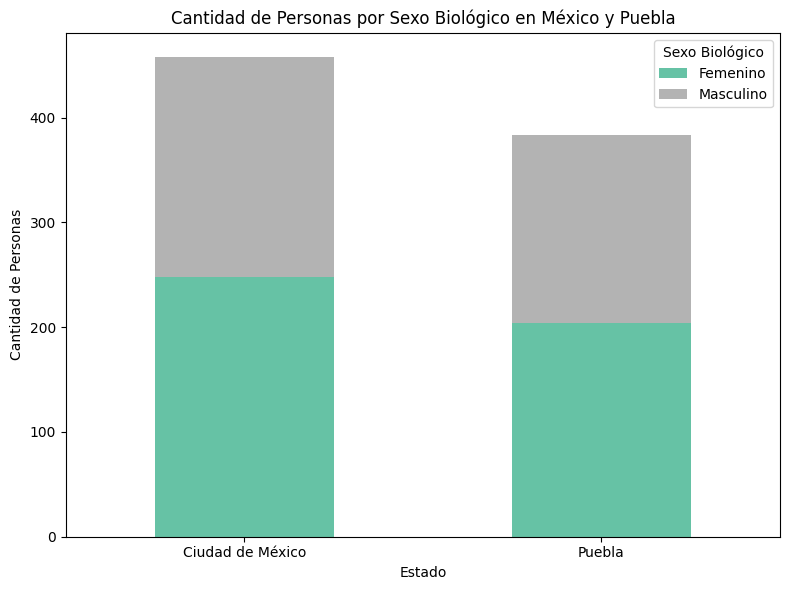

In [36]:
# 1. Filtrar estados
estados = ['Ciudad de M√©xico', 'Puebla']
df_filtrado = df[df['estado'].isin(estados)]

# 2. Agrupar por estado y sexo biol√≥gico
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# 3. Crear gr√°fico de columnas apiladas
conteo.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# 4. Personalizaci√≥n
plt.title('Cantidad de Personas por Sexo Biol√≥gico en M√©xico y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sexo Biol√≥gico')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [37]:
# Crear una columna con el trimestre (como texto: "Q1", "Q2", etc.)
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

# Agrupar por trimestre y m√©todo de pago, y sumar la facturaci√≥n
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()
ventas_trimestrales

metodo_pago     Paypal  Tarjeta de Cr√©dito  Tarjeta de D√©bito  Transferencia
trimestre                                                                   
2023Q1       159392.78           567801.62          160984.48      716355.57
2023Q2       408176.22          1675152.84          271050.18     1351769.42
2023Q3       323562.78          1899375.64          166394.70     1280637.06
2023Q4       775944.52          3627098.81          683999.86     2911311.03

In [38]:
# Crear gr√°fico de barras apiladas
ventas_trimestrales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Personalizaci√≥n
plt.title('Ventas Trimestrales por M√©todo de Pago - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total')
plt.legend(title='M√©todo de Pago')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


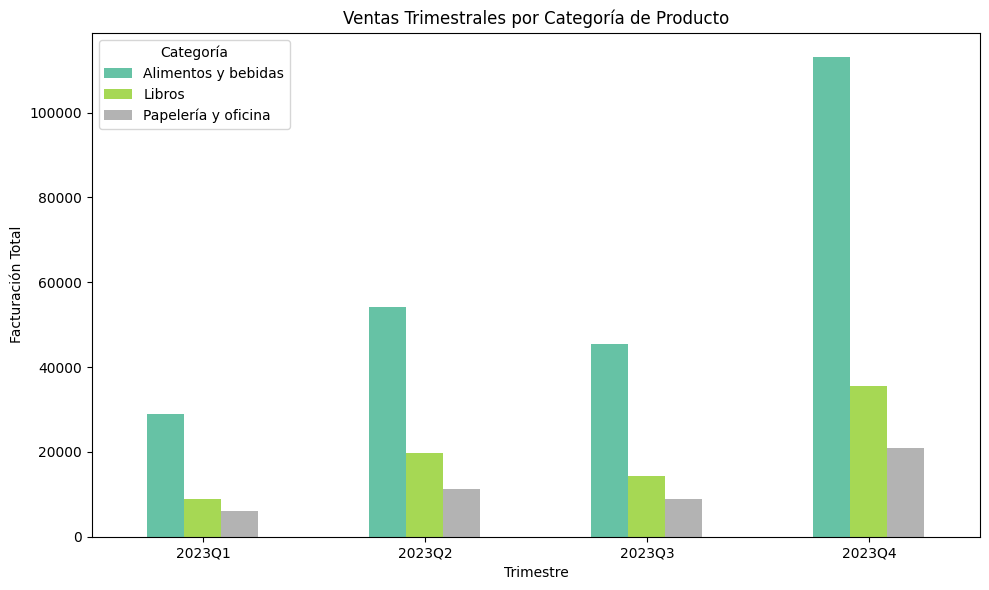

In [39]:
#Desaf√≠o
# 1. Filtrar las categor√≠as deseadas
categorias_deseadas = ['Papeler√≠a y oficina', 'Libros', 'Alimentos y bebidas']
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]

# 2. Agrupar por trimestre y categor√≠a
ventas_cat_trim = df_filtrado.groupby(['trimestre', 'categoria'])['facturacion'].sum().unstack(fill_value=0)

# 3. Crear gr√°fico de columnas agrupadas
ventas_cat_trim.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# 4. Personalizar el gr√°fico
plt.title('Ventas Trimestrales por Categor√≠a de Producto')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total')
plt.legend(title='Categor√≠a')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

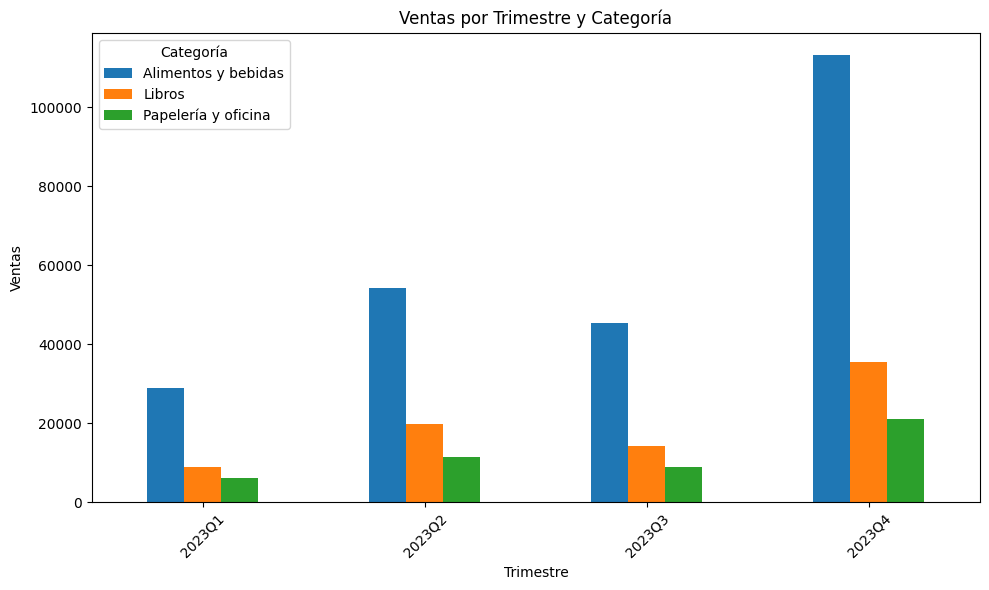

In [40]:
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['trimestre'] = df['fecha'].dt.to_period('Q')
# Suponiendo que ya tienes el DataFrame df
# Filtrar las categor√≠as deseadas
categorias_deseadas = ["Papeler√≠a y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]
# Pivotar los datos para tener los trimestres como √≠ndice y las categor√≠as como columnas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='facturacion', aggfunc='sum')
# Crear el gr√°fico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y t√≠tulo
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categor√≠a')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gr√°fico
plt.legend(title='Categor√≠a')
plt.tight_layout()
plt.show()

###Desaf√≠o

Desaf√≠o 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturaci√≥n de las ventas por regi√≥n. Recuerda que aqu√≠ la facturaci√≥n se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de env√≠o.

## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [41]:
# 1. Contar la cantidad de usuarios que participan o no en cashback
conteo_cashback = df['cashback'].value_counts()

# 2. Crear gr√°fico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo_cashback, labels=conteo_cashback.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'],startangle=90, explode=(0.05,0))
plt.title('Proporci√≥n de Usuarios(as) en el Programa de Cashback - Zoop')
plt.axis('equal')  # Mantener el c√≠rculo
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [42]:
# 1. Contar la cantidad de usuarios que participan o no en cashback
conteo_cashback = df['cashback'].value_counts()

# 2. Definir colores: azul y rojo
colores = ['#d62728','#1f77b4']  # rojo y azul

# 3. Crear gr√°fico tipo rosquilla
plt.figure(figsize=(6, 6))
plt.pie(conteo_cashback, labels=conteo_cashback.index, autopct='%1.1f%%',
        colors=colores, startangle=90,explode=(0.05,0), wedgeprops={'width': 0.3})

# 4. T√≠tulo y formato
plt.title('Proporci√≥n de Usuarios(as) en el Programa de Cashback - Zoop')
plt.axis('equal')  # Mantener forma circular
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


In [43]:

# Histograma con bins para cada nota (de 0 a 10)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue', discrete=True)

plt.title('Distribuci√≥n de las Evaluaciones (Notas) de los Clientes')
plt.xlabel('Calificaci√≥n (Nota)')
plt.ylabel('Cantidad de Compras')
plt.xticks(range(0,11))  # Mostrar todas las notas de 0 a 10
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez m√°s, no necesitamos especificar directamente el tipo de gr√°fico, ya que al mencionar la distribuci√≥n de valores num√©ricos de una simple columna, ChatGPT logr√≥ interpretar y proporcionar el c√≥digo para un histograma de columnas. Este gr√°fico es ideal para presentar la distribuci√≥n de una muestra de datos o poblaci√≥n. Cada columna aqu√≠ representa la frecuencia de repetici√≥n de un valor.

¬øTe gustar√≠a experimentar haciendo lo mismo solo con las edades?


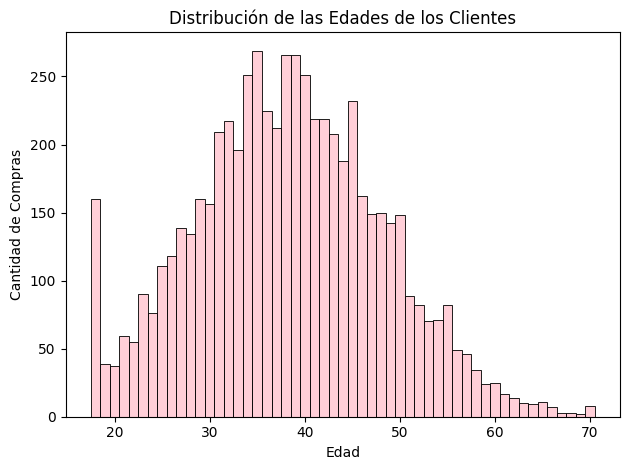

In [44]:

# Histograma con bins para cada edad
sns.histplot(df['edad'], bins=11, kde=False, color='pink', discrete=True)

plt.title('Distribuci√≥n de las Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Compras')
plt.tight_layout()
plt.show()

### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


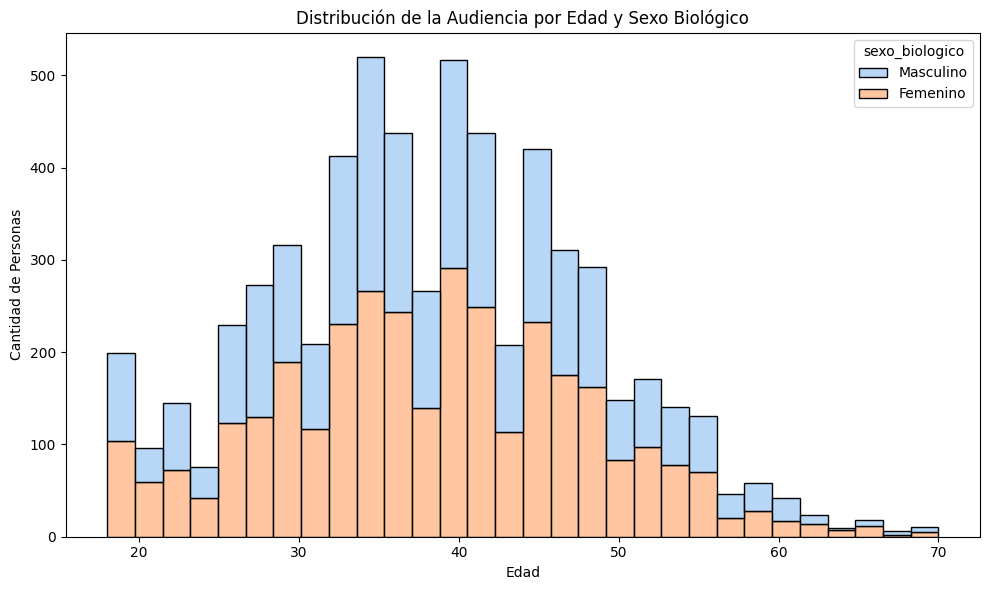

In [45]:
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='edad', hue='sexo_biologico', multiple='stack', bins=30, palette='pastel')

plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en una misma barra. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


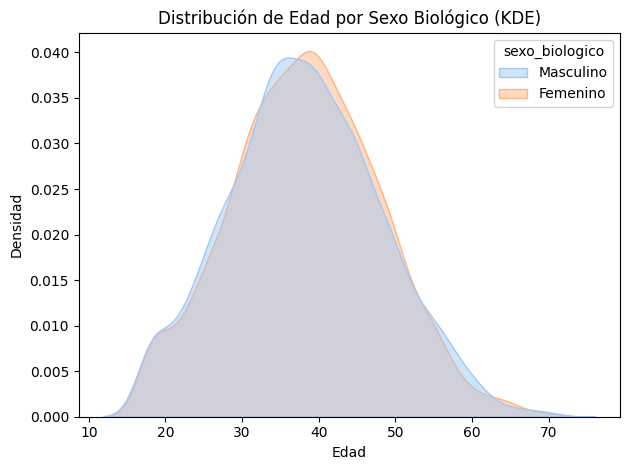

In [46]:
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, common_norm=False, palette='pastel', alpha=0.5)

plt.title('Distribuci√≥n de Edad por Sexo Biol√≥gico (KDE)')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


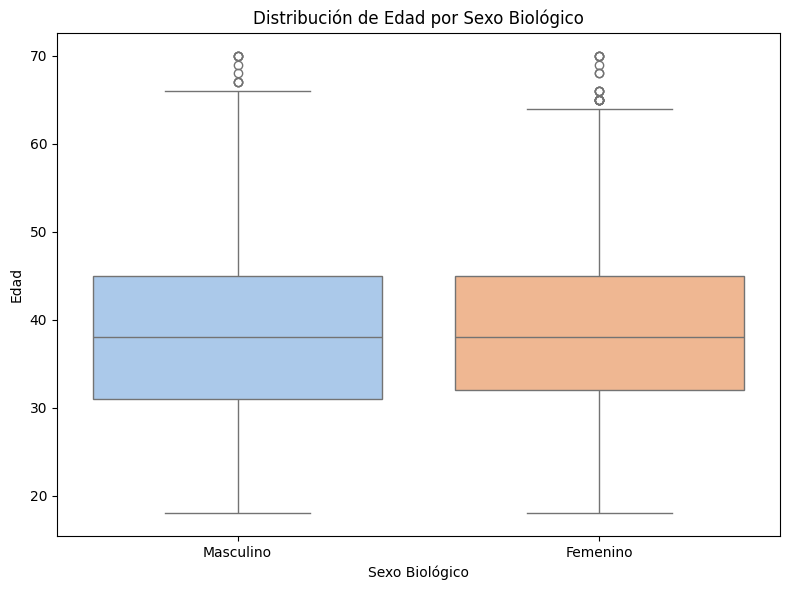

In [47]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='pastel')

plt.title('Distribuci√≥n de Edad por Sexo Biol√≥gico')
plt.xlabel('Sexo Biol√≥gico')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


#Desaf√≠o

Has recibido una nueva solicitud de Zoop para generar 2 visuales, siendo uno de ellos relacionado al registro de clientes para un nuevo servicio que Zoop implementar√°, el Zoop Pay, y el otro sobre las evaluaciones de los clientes en relaci√≥n con su ubicaci√≥n. Observemos las dos situaciones y construyamos con la ayuda de ChatGPT los dos gr√°ficos solicitados:

Desaf√≠o 1:

Zoop est√° en proceso de lanzamiento de su billetera digital, que brindar√° acceso a una serie de beneficios para sus clientes, y le gustar√≠a saber cu√°l es el porcentaje de personas que ya est√°n pre-registradas para este producto. El e-commerce busca comprender este n√∫mero para definir la necesidad de promoci√≥n y esfuerzo para atraer m√°s clientes a esta funcionalidad.

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que presente la proporci√≥n de personas pre-registradas en Zoop Pay.

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico presente la proporci√≥n de personas pre-registradas en Zoop Pay, la columna es 'zoop_pay'.

In [48]:
df.head(1)

ID_compra      fecha horario     categoria  precio_unitario  cantidad  \
0          6 2023-01-03   20:40  Electr√≥nicos           4457.9         4   

    envio metodo_pago  ID_cliente  edad sexo_biologico      ciudad  estado  \
0  713.26      Paypal        6149    30      Masculino  Hermosillo  Sonora   

     region cashback  nota zoop_pay  facturacion  a√±o_mes trimestre  
0  Noroeste       S√≠    10       No     18544.86  2023-01    2023Q1

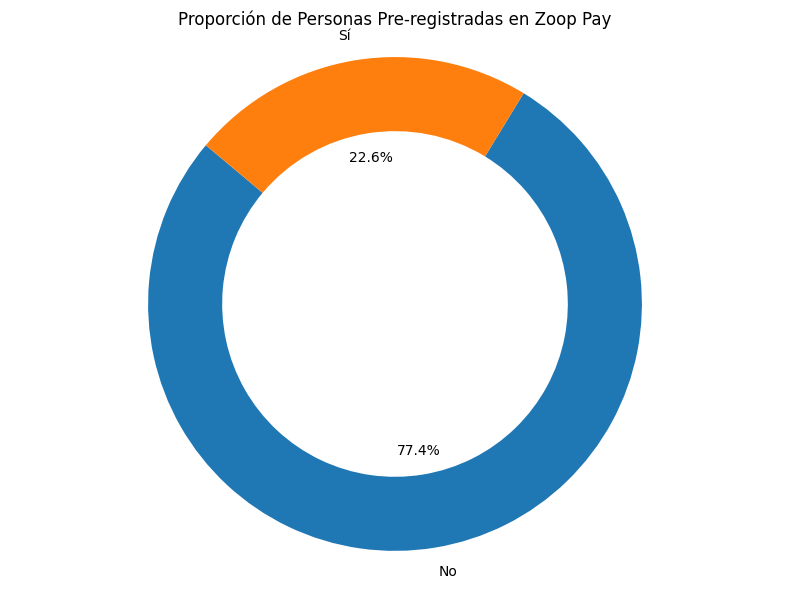

In [49]:
# Conteo de valores
conteo = df['zoop_pay'].value_counts()

# Colores personalizados
colores = ['#1f77b4', '#ff7f0e']  # Azul y naranja

# Gr√°fico de pastel
plt.figure(figsize=(8,6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', colors=colores, startangle=140,wedgeprops=dict(width=0.3))
plt.title('Proporci√≥n de Personas Pre-registradas en Zoop Pay')
plt.axis('equal')
plt.tight_layout()
plt.show()

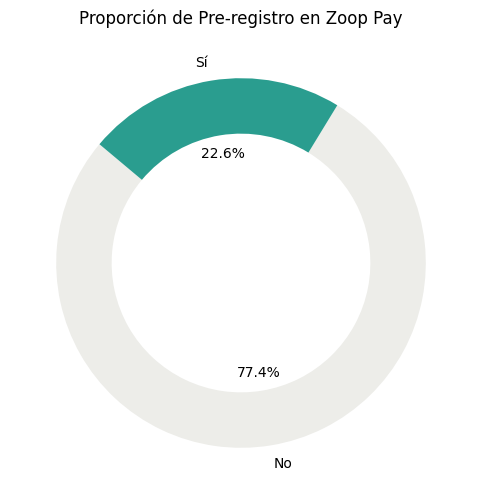

In [50]:
#Soluci√≥n del instructor
# Contabiliza la cantidad de usuarios que realizaron el pre-registro en Zoop Pay
pre_registro_counts = df['zoop_pay'].value_counts()

# Define los colores para cada valor
colors = ['#2a9d8f' if valor == 'S√≠' else '#edede9' for valor in pre_registro_counts.index]

# Crea el gr√°fico de dona
plt.figure(figsize=(8, 6))
plt.pie(pre_registro_counts, labels=pre_registro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# A√±ade un t√≠tulo al gr√°fico
plt.title('Proporci√≥n de Pre-registro en Zoop Pay')

# Muestra el gr√°fico
plt.show()

Desaf√≠o 2:

Zoop quiere analizar la distribuci√≥n de las edades de los clientes por regi√≥n con el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del pa√≠s, y para ello, solicit√≥ un visual que distribuya estos datos. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la distribuci√≥n de las edades de los clientes por regi√≥n.

In [51]:
df.head(1)

ID_compra      fecha horario     categoria  precio_unitario  cantidad  \
0          6 2023-01-03   20:40  Electr√≥nicos           4457.9         4   

    envio metodo_pago  ID_cliente  edad sexo_biologico      ciudad  estado  \
0  713.26      Paypal        6149    30      Masculino  Hermosillo  Sonora   

     region cashback  nota zoop_pay  facturacion  a√±o_mes trimestre  
0  Noroeste       S√≠    10       No     18544.86  2023-01    2023Q1

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico muestre la distribuci√≥n las edades (columna: 'edad') de los clientes por regi√≥n (columna:'region').

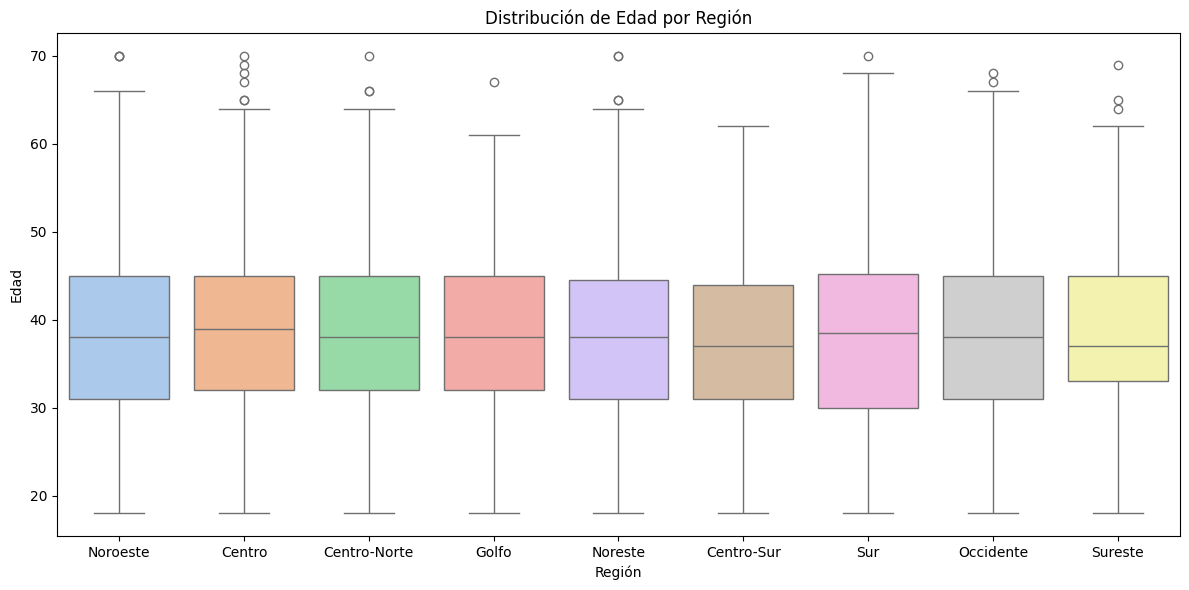

In [52]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='region', y='edad', palette='pastel')

plt.title('Distribuci√≥n de Edad por Regi√≥n')
plt.xlabel('Regi√≥n')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

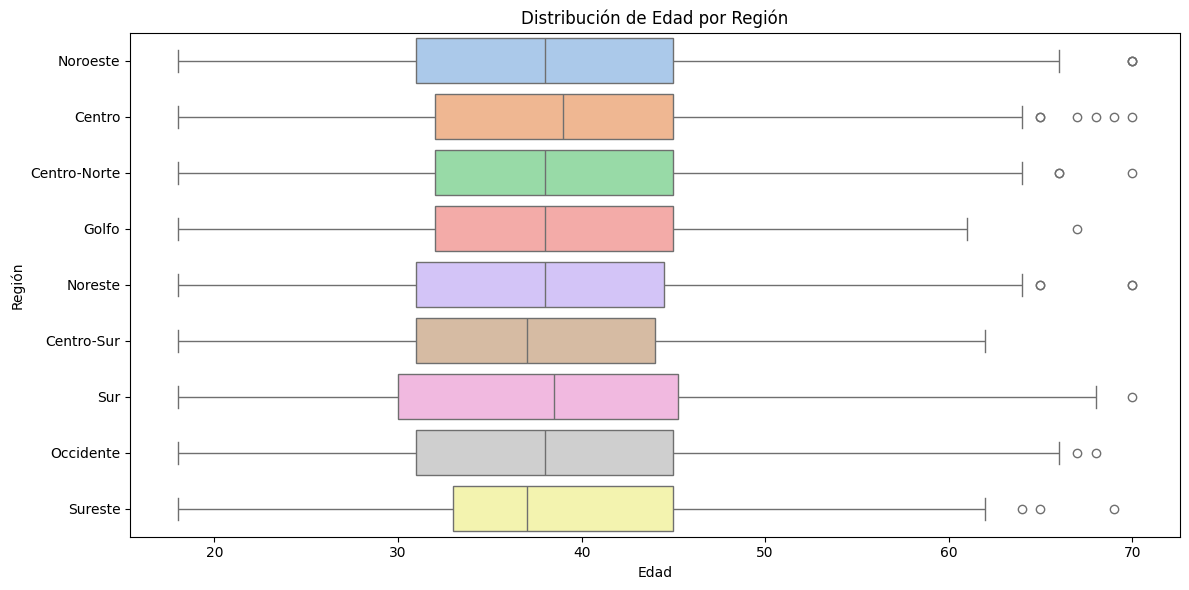

In [53]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='edad', y='region', palette='pastel')

plt.title('Distribuci√≥n de Edad por Regi√≥n')
plt.xlabel('Edad')
plt.ylabel('Regi√≥n')
plt.tight_layout()
plt.show()

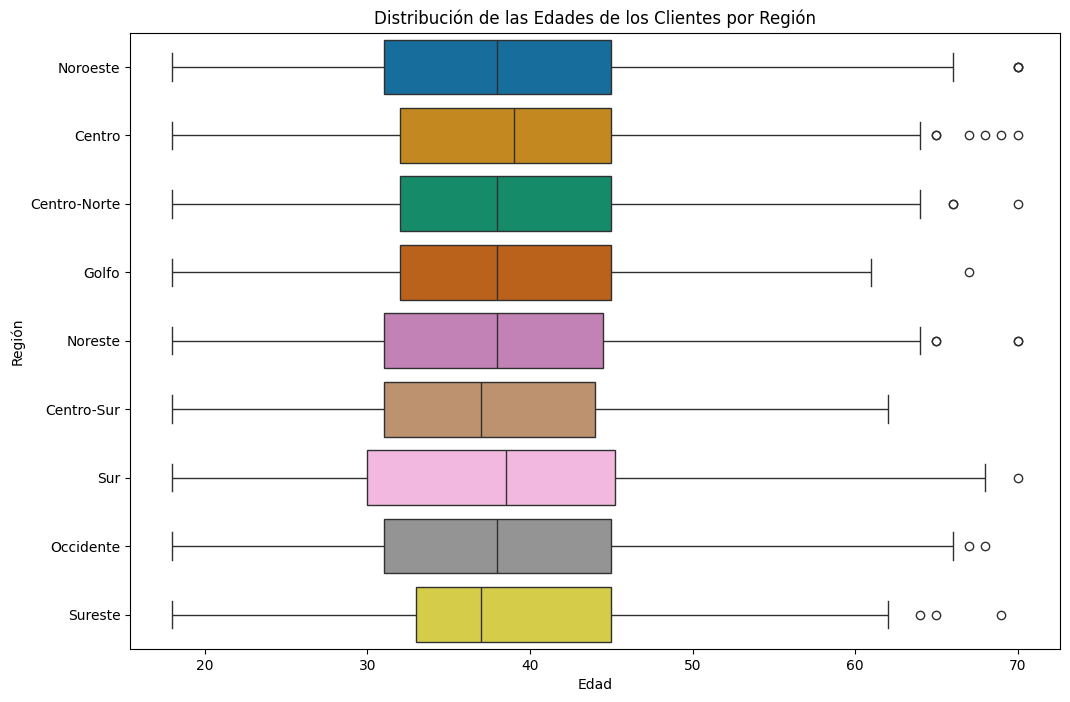

In [54]:
# Creaci√≥n del boxplot
plt.figure(figsize=(12, 8))  # Define el tama√±o del gr√°fico
boxplot = sns.boxplot(x='edad', y='region', data=df, palette="colorblind")  # Crea el boxplot

# A√±ade t√≠tulos y etiquetas a los ejes
plt.title('Distribuci√≥n de las Edades de los Clientes por Regi√≥n')  # T√≠tulo del gr√°fico
plt.xlabel('Edad')  # Etiqueta del eje X
plt.ylabel('Regi√≥n')  # Etiqueta del eje Y

# Muestra el gr√°fico
plt.show()

## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [55]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

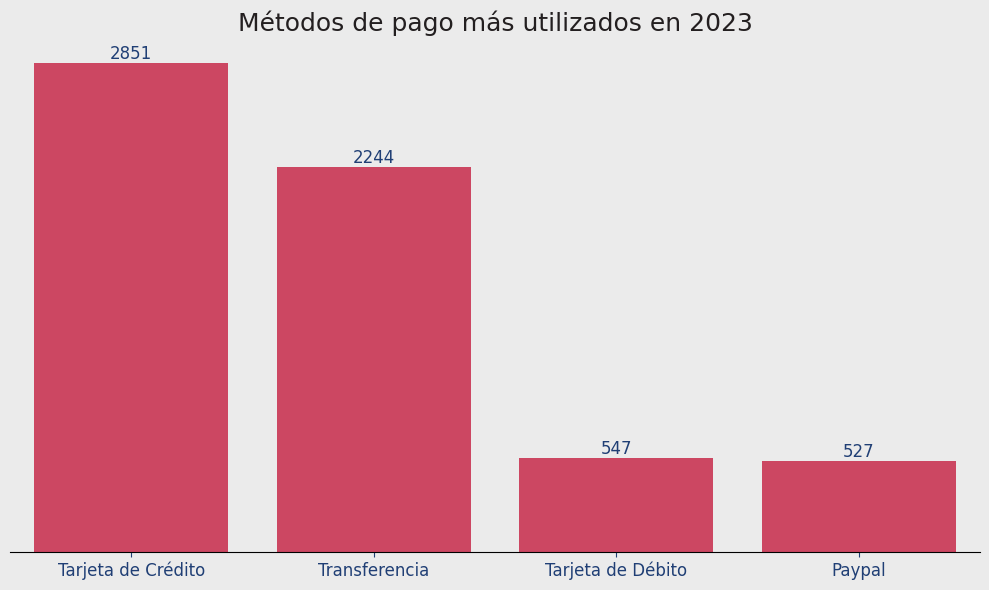

In [56]:
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# Crear gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', color=ROJO_1)

# Fondo de figura y del gr√°fico
ax.set_facecolor(GRIS_1)
ax.figure.set_facecolor(GRIS_1)

# T√≠tulo
ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5)

# Etiquetas del eje X
ax.set_xlabel('', fontsize=12, color=AZUL_1)
ax.set_ylabel('', fontsize=12, color=AZUL_1)
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Quitar eje Y y ticks
ax.set_yticks([])

# Quitar bordes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Mostrar los valores encima de las columnas
for i, row in metodos_de_pago.iterrows():
    ax.text(i, row['cantidad'] + 1, str(row['cantidad']),
            ha='center', va='bottom', fontsize=12, color=AZUL_1)
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

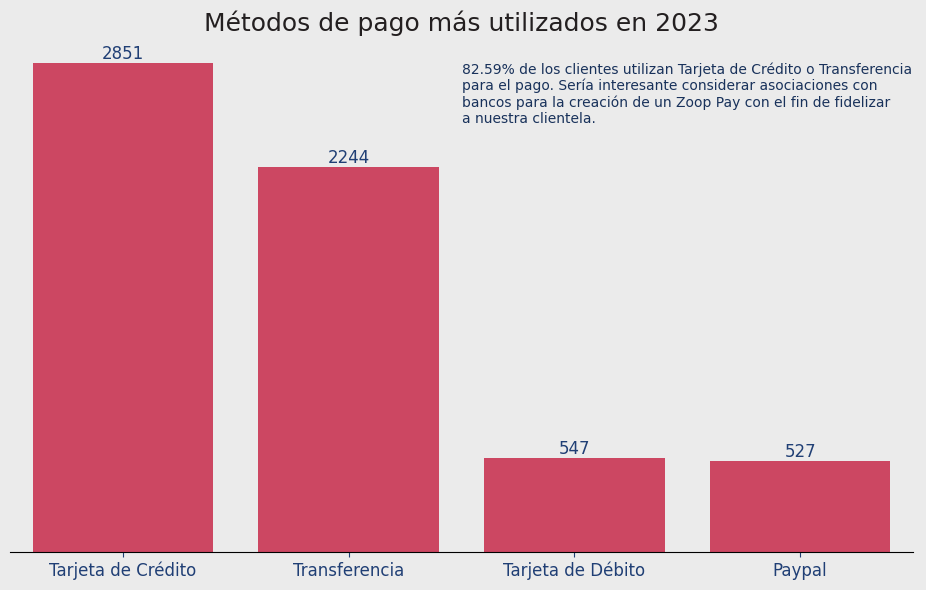

In [57]:

# Tabla de m√©todos de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# Calcular el porcentaje solicitado
suma_tarjeta_transferencia = metodos_de_pago.loc[
    metodos_de_pago['metodo_pago'].isin(['Tarjeta de Cr√©dito', 'Transferencia']),
    'cantidad'
].sum()

total = metodos_de_pago['cantidad'].sum()
porcentaje = (suma_tarjeta_transferencia / total) * 100

# Crear gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', color=ROJO_1)

# Fondos
ax.set_facecolor(GRIS_1)
ax.figure.set_facecolor(GRIS_1)

# T√≠tulo
ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel('', fontsize=12, color=AZUL_1)
ax.set_ylabel('', fontsize=12, color=AZUL_1)
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.set_yticks([])

# Eliminar bordes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Mostrar etiquetas encima de las barras
for i, row in metodos_de_pago.iterrows():
    ax.text(i, row['cantidad'] + 1, str(row['cantidad']),
            ha='center', va='bottom', fontsize=12, color=AZUL_1)

# A√±adir texto explicativo
texto = (f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
         "para el pago. Ser√≠a interesante considerar asociaciones con \n"
         "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
         "a nuestra clientela.")
ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


In [58]:
# Crear el gr√°fico
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o')

# Personalizar gr√°fico
plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n Total')
plt.grid(True)
plt.tight_layout()
plt.show()


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


In [59]:
# Crear columna con nombre del mes
df['mes'] = df['fecha'].dt.strftime('%B')

# Agrupar facturaci√≥n por mes, ordenando con el diccionario "meses"
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Iniciar la figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar l√≠nea
ax.plot(meses.values(), ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# T√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# Etiquetas eje x
ax.set_xticks(range(len(meses)))
ax.set_xticklabels(meses.values(), fontsize=12, color=AZUL_1)

# Etiquetas eje y con formato "MXN$ valor M"
ax.set_yticklabels ([f'MXN$ {x/1e6:,.2f} M' for x in ax.get_yticks ()], fontsize=12, color=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eliminar nombres de ejes
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
meses.values()

dict_values(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


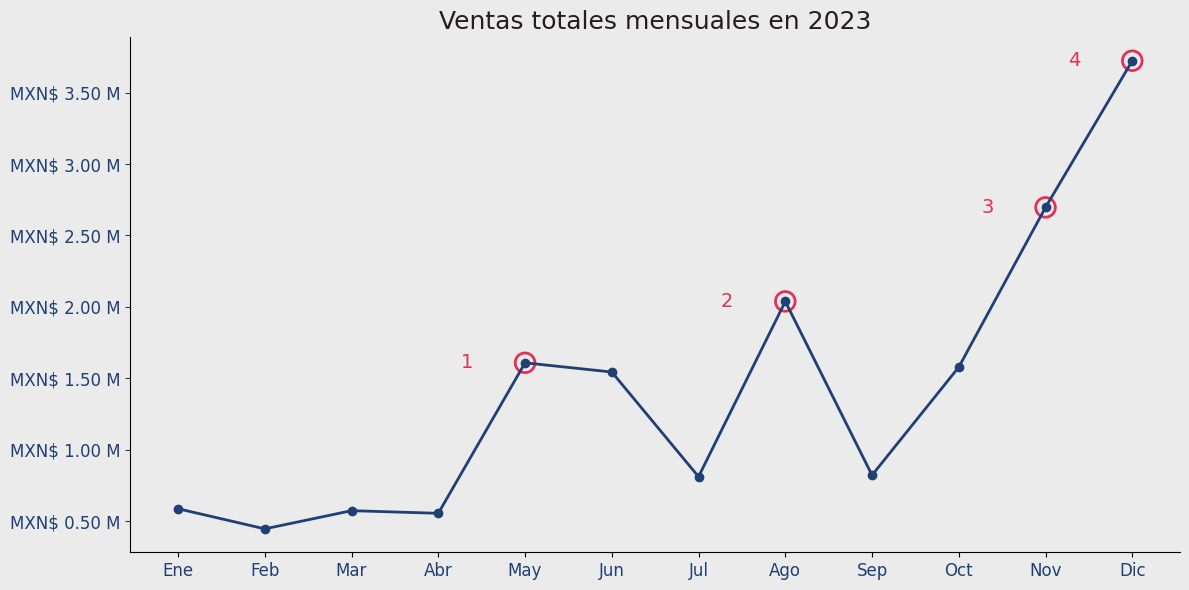

In [61]:
# Iniciar la figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar l√≠nea
ax.plot(meses.values(), ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# T√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# Etiquetas eje x
ax.set_xticks(range(len(meses)))
ax.set_xticklabels(meses.values(), fontsize=12, color=AZUL_1)

# Etiquetas eje y con formato "MXN$ valor M"
ax.set_yticklabels([f'MXN$ {x/1e6:,.2f} M' for x in ax.get_yticks()], fontsize=12, color=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eliminar nombres de ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Coordenadas de los puntos deseados
indices = [4, 7, 10, 11]  # 5¬∫, 8¬∫, 11¬∫ y 12¬∫
x_vals = list(range(len(meses)))
y_vals = ventas_mensuales.values

# Dibujar c√≠rculos usando scatter (huecos con borde rojo)
for i, idx in enumerate(indices):
    x = x_vals[idx]
    y = y_vals[idx]

    ax.scatter(x, y, s=200,  # Radio al cuadrado, ajustar seg√∫n escala
               facecolors='none', edgecolors=ROJO_1, linewidths=2)

    # Agregar n√∫mero a la izquierda del c√≠rculo
    ax.text(x - 0.6, y, str(i + 1), color=ROJO_1, fontsize=14, ha='right', va='center')

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos a√±adido 4 marcadores que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


#Desaf√≠o

Zoop ha seleccionado 2 de los visuales creados para formar parte del informe con la narraci√≥n de datos de la empresa. Se ha definido que se utilizar√°n los visuales con el facturamiento por regi√≥n en 2023 y el de personas pre-registradas en Zoop Pay. Refinaremos ambos visuales siguiendo las instrucciones a continuaci√≥n y la paleta de colores de la e-commerce, alter√°ndolos con la ayuda de ChatGPT:

**Desaf√≠o 1**

Construye y ejecuta un prompt en ChatGPT para refinar el visual que presenta el facturamiento de las ventas por regi√≥n. Las instrucciones para el refinamiento son las siguientes:

Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1
Color de las columnas en AQUA_1 (si deseas destacar solo una, puedes recurrir a AQUA_3, por ejemplo)
Tama√±o de la figura de (16,9)
Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5, ajusta las etiquetas y r√≥tulos del eje x e y, cuando existan, a un tama√±o 12 y color AZUL_1
Elimina el m√°ximo de bordes posible y ajusta los datos para que se presenten en las barras en orden de millones, con color AZUL_1 y tama√±o 12

Observaci√≥n 1: Todas las variables que representan los colores en las instrucciones est√°n en una celda en la pesta√±a Paleta de Colores dentro del notebook Desaf√≠os de la Clase 04.

Observaci√≥n 2: Es probable que al ejecutar los prompts, ChatGPT sugiera colores para las variables y modificaciones en los c√≥digos que llaman al DataFrame deseado. Presta mucha atenci√≥n para eliminar la nueva definici√≥n de colores y ajustar el DataFrame seg√∫n lo que has hecho en actividades anteriores.

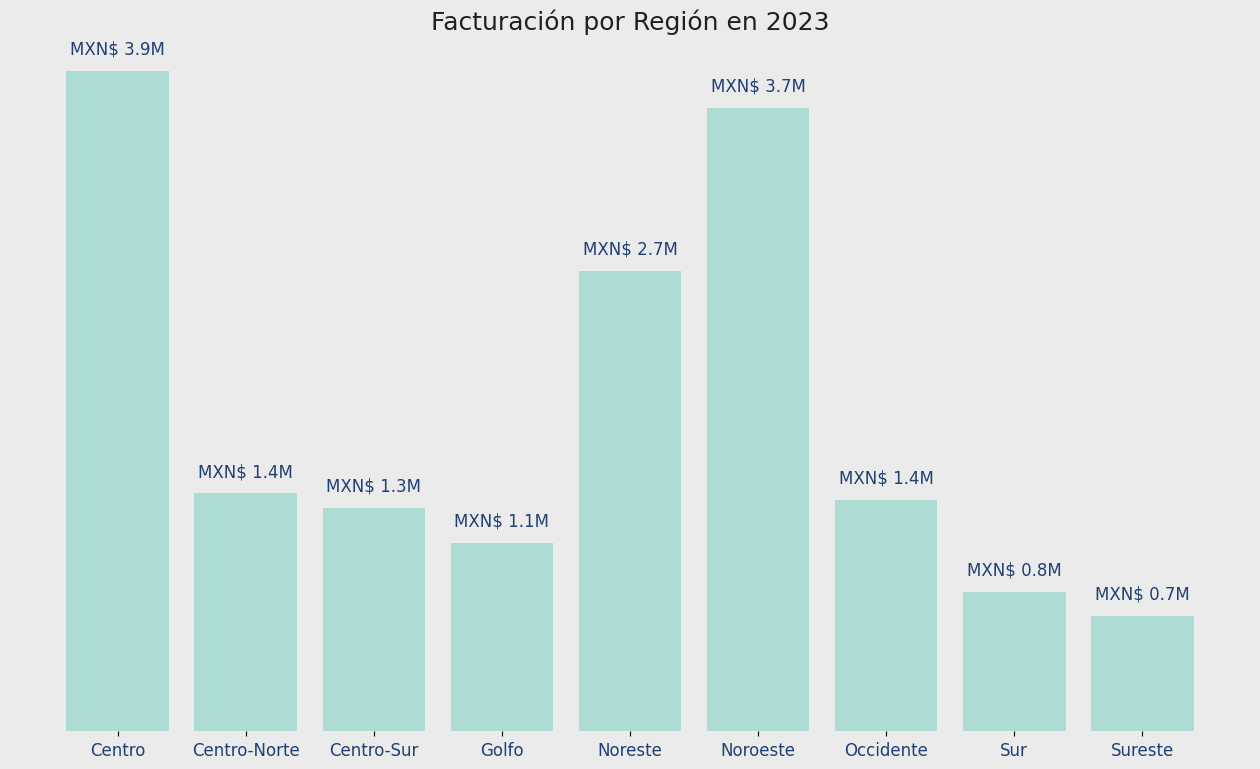

In [62]:
import matplotlib.pyplot as plt

# Ejemplo de datos agrupados por regi√≥n y suma de la facturaci√≥n
# facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordenaci√≥n de los datos para una mejor visualizaci√≥n (suponiendo que los datos ya est√©n preparados)
# facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Configuraciones generales de la figura
plt.figure(figsize=(16, 9), facecolor=GRIS_1)
plt.gca().set_facecolor(GRIS_1)  # Configuraci√≥n del fondo del gr√°fico

# Creaci√≥n del gr√°fico de columnas
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'] / 1e6, color=AQUA_1)
plt.title('Facturaci√≥n por Regi√≥n en 2023', color=GRIS_5, fontsize=18)
plt.yticks([])  # Eliminaci√≥n de las etiquetas del eje y
plt.ylabel('')  # Eliminaci√≥n de la etiqueta del eje y
plt.xticks(fontsize=12, color=AZUL_1)
plt.box(False)  # Eliminaci√≥n de los bordes del gr√°fico

# A√±ade el total de la facturaci√≥n encima de cada columna
for index, value in enumerate(facturacion_por_region['facturacion']):
    plt.text(index, value / 1e6 + 0.1, f'MXN$ {value / 1e6:.1f}M', color=AZUL_1, ha='center', fontsize=12)

# Muestra el gr√°fico
plt.show()


**Desaf√≠o 2**

Construye y ejecuta un prompt en ChatGPT para refinar el visual que presenta la proporci√≥n de personas pre-registradas en Zoop Pay. Las instrucciones para el refinamiento son las siguientes:

Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1.

Color de las porciones: AZUL_1 para "S√≠" y GRIS_3 para "No".

Tama√±o de la figura de (6,6).

Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5.

A√±ade etiquetas en las porciones con tama√±o 12 y los porcentajes tambi√©n con tama√±o 12 y en negrita. Los porcentajes deben estar en color BLANCO y las etiquetas de las porciones en el mismo color que las porciones.

Ajusta la rosca para que su ancho sea de 0.4 y los porcentajes de las porciones est√©n en la posici√≥n 0.8 en relaci√≥n al centro.

Evita explosiones de porciones y efectos que dificulten el an√°lisis del gr√°fico.

In [63]:
import matplotlib.pyplot as plt

# Contabiliza la cantidad de usuarios que realizaron el prerregistro en Zoop Pay
pre_registro_counts = df['zoop_pay'].value_counts()

# Define los colores para cada valor
colors = [AZUL_3 if label == 'S√≠' else GRIS_3 for label in pre_registro_counts.index]

# Crea el gr√°fico de rosquilla
plt.figure(figsize=(6, 6), facecolor=GRIS_1)
plt.gca().set_facecolor(GRIS_1)  # Cambia el color del fondo del gr√°fico
patches, texts, autotexts = plt.pie(pre_registro_counts, labels=pre_registro_counts.index, autopct='%1.1f%%', startangle=180, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)

# A√±ade el t√≠tulo con el color y tama√±o especificados
plt.title('¬øPre-registrado(a) en Zoop Pay?', color=GRIS_5, fontsize=18)

# Configura los colores y tama√±os de las etiquetas de las porciones y porcentajes
for text, autotext, color in zip(texts, autotexts, [GRIS_3, AZUL_3]):
    text.set_color(color)  # Define el color de la etiqueta de la porci√≥n igual al color de la porci√≥n
    text.set_fontsize(12)
    autotext.set_color(BLANCO)  # Define el color de los porcentajes como blanco
    autotext.set_weight('bold')  # Define los porcentajes en negrita
    autotext.set_fontsize(12)
# Muestra el gr√°fico
plt.show()

# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

In [64]:
def metodo_pago():
  metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
  metodos_de_pago.columns = ['metodo_pago', 'cantidad']

  # Crear gr√°fico
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', color=ROJO_1)

  # Fondo de figura y del gr√°fico
  ax.set_facecolor(GRIS_1)
  ax.figure.set_facecolor(GRIS_1)

  # T√≠tulo
  ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5)

  # Etiquetas del eje X
  ax.set_xlabel('', fontsize=12, color=AZUL_1)
  ax.set_ylabel('', fontsize=12, color=AZUL_1)
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

  # Quitar eje Y y ticks
  ax.set_yticks([])

  # Quitar bordes
  for spine in ['top', 'right', 'left']:
      ax.spines[spine].set_visible(False)

  # Mostrar los valores encima de las columnas
  for i, row in metodos_de_pago.iterrows():
      ax.text(i, row['cantidad'] + 1, str(row['cantidad']),
              ha='center', va='bottom', fontsize=12, color=AZUL_1)
  plt.tight_layout()

    # A√±adir texto explicativo
  texto = (f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
          "para el pago. Ser√≠a interesante considerar asociaciones con \n"
          "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
          "a nuestra clientela.")
  ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)


  return plt

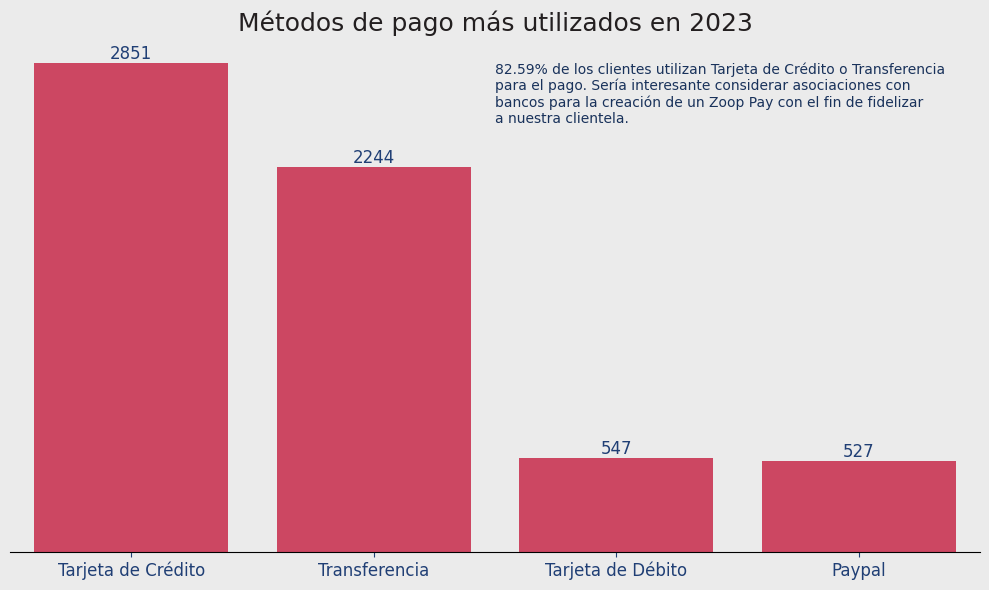

In [65]:
metodo_pago().show()

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

In [66]:
def ventas_totales():
  # Crear columna con nombre del mes
  df['mes'] = df['fecha'].dt.strftime('%B')

  # Agrupar facturaci√≥n por mes, ordenando con el diccionario "meses"
  ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

  # Iniciar la figura
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Graficar l√≠nea
  ax.plot(meses.values(), ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

  # T√≠tulo
  ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

  # Etiquetas eje x
  ax.set_xticks(range(len(meses)))
  ax.set_xticklabels(meses.values(), fontsize=12, color=AZUL_1)

  # Etiquetas eje y con formato "MXN$ valor M"
  ax.set_yticklabels ([f'MXN$ {x/1e6:,.2f} M' for x in ax.get_yticks ()], fontsize=12, color=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar bordes superior y derecho
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Eliminar nombres de ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

    # Coordenadas de los puntos deseados
  indices = [4, 7, 10, 11]  # 5¬∫, 8¬∫, 11¬∫ y 12¬∫
  x_vals = list(range(len(meses)))
  y_vals = ventas_mensuales.values

  # Dibujar c√≠rculos usando scatter (huecos con borde rojo)
  for i, idx in enumerate(indices):
      x = x_vals[idx]
      y = y_vals[idx]

      ax.scatter(x, y, s=200,  # Radio al cuadrado, ajustar seg√∫n escala
                facecolors='none', edgecolors=ROJO_1, linewidths=2)

      # Agregar n√∫mero a la izquierda del c√≠rculo
      ax.text(x - 0.6, y, str(i + 1), color=ROJO_1, fontsize=14, ha='right', va='center')

  plt.tight_layout()

  return plt

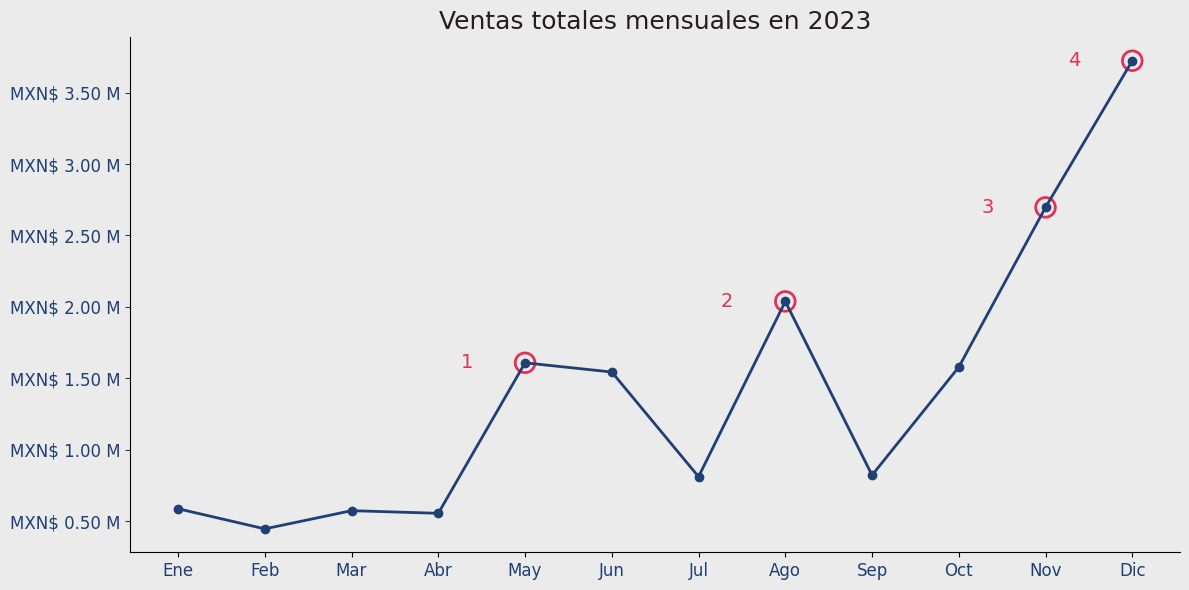

In [67]:
ventas_totales().show()

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python

# 1. Calcular la facturaci√≥n para cada compra
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# 3. Ordenar los datos por facturaci√≥n de mayor a menor
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

# 4. Crear el gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis',orient='h')

# 5. A√±adir etiquetas y t√≠tulo
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n (en MXN$)', fontsize=12)
plt.ylabel('Categor√≠a', fontsize=12)

# 6. Mostrar el gr√°fico
plt.show()
```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [68]:
def facturacion_por_categoria():
  # 1. Calcular la columna de facturaci√≥n por fila
  df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

  # 2. Agrupar por categor√≠a y sumar la facturaci√≥n
  facturacion_por_categoria = df.groupby('categoria')['facturacion'].sum().sort_values()

  # 3. Calcular el porcentaje para el texto interno
  total = facturacion_por_categoria.sum()
  primera_categoria = facturacion_por_categoria.iloc[-1]  # Asumimos que es 'Electr√≥nica'
  porcentaje = (primera_categoria / total) * 100

  # 4. Crear gr√°fico de barras horizontales
  plt.figure(figsize=(10, 6), facecolor=GRIS_1)
  ax = sns.barplot(
      x=facturacion_por_categoria.values,
      y=facturacion_por_categoria.index,
      palette=[AQUA_1]*len(facturacion_por_categoria)
  )
  ax.set_facecolor(GRIS_1)

  # 5. Personalizaci√≥n
  plt.title('Facturaci√≥n por categor√≠a de producto en 2023', fontsize=18, color=GRIS_5)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticks([])

  # Personalizar etiquetas del eje y
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar bordes del gr√°fico
  for spine in ax.spines.values():
      spine.set_visible(False)

  # 6. Mostrar valores al final de cada barra
  for i, value in enumerate(facturacion_por_categoria.values):
      ax.text(value + 10000, i, f"MXN ${value:,.0f}", va='center', ha='left', fontsize=12, color=AZUL_1)

  # 7. Texto explicativo dentro del √°rea del gr√°fico
  ax.text(
      0.4e7, 5,
      f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\n"
      "Esto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\n"
      "presentes en el portafolio de Zoop.",
      fontsize=12, color=AZUL_3
  )

  plt.tight_layout()
  return plt

In [69]:
facturacion_por_categoria().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python

# 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar los datos por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3. Crear el gr√°fico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 4. A√±adir etiquetas y t√≠tulo
plt.title('Ventas por Trimestre y M√©todo de Pago', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Facturaci√≥n Total', fontsize=12)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# 5. Mostrar el gr√°fico
plt.legend(title='M√©todo de Pago por trimestre de 2023')
plt.tight_layout()
plt.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [70]:
def ventas_por_trimestre():
  import matplotlib.ticker as mtick
  # 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
  df['trimestre'] = df['fecha'].dt.to_period('Q')

  # 2. Agrupar los datos por trimestre y m√©todo de pago, sumando la facturaci√≥n
  ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

  # 3. Crear el gr√°fico de barras apiladas
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)
  ventas_trimestre.plot(
      kind='bar',
      stacked=True,
      ax=ax,
      color=[BLANCO, GRIS_2, AQUA_1,AQUA_3],  # Aplicar paleta de colores
      edgecolor=GRIS_1
  )

  # 4. Personalizar fondo y estilo
  ax.set_facecolor(GRIS_1)
  ax.set_title('Ventas por Trimestre y M√©todo de Pago en 2023', fontsize=18, color=GRIS_4)
  ax.set_xlabel('')
  ax.set_ylabel('')

  # 5. Personalizar etiquetas del eje x
  ax.set_xticklabels([str(t) for t in ventas_trimestre.index], fontsize=12, color=AZUL_1, rotation=0)

  # 6. Personalizar etiquetas del eje y
  def millones(x, pos):
      return f'MXN$ {x*1e-6:.0f} M'
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(millones))
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # 7. Eliminar bordes del gr√°fico
  for spine in ['top', 'right', 'left', 'bottom']:
      ax.spines[spine].set_visible(False)

  # 8. Agregar cuadr√≠cula punteada horizontal
  ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color=GRIS_3)
  ax.xaxis.grid(False)

  # 9. Leyenda
  ax.legend(title='M√©todo de Pago por trimestre de 2023')

  plt.tight_layout()
  return plt

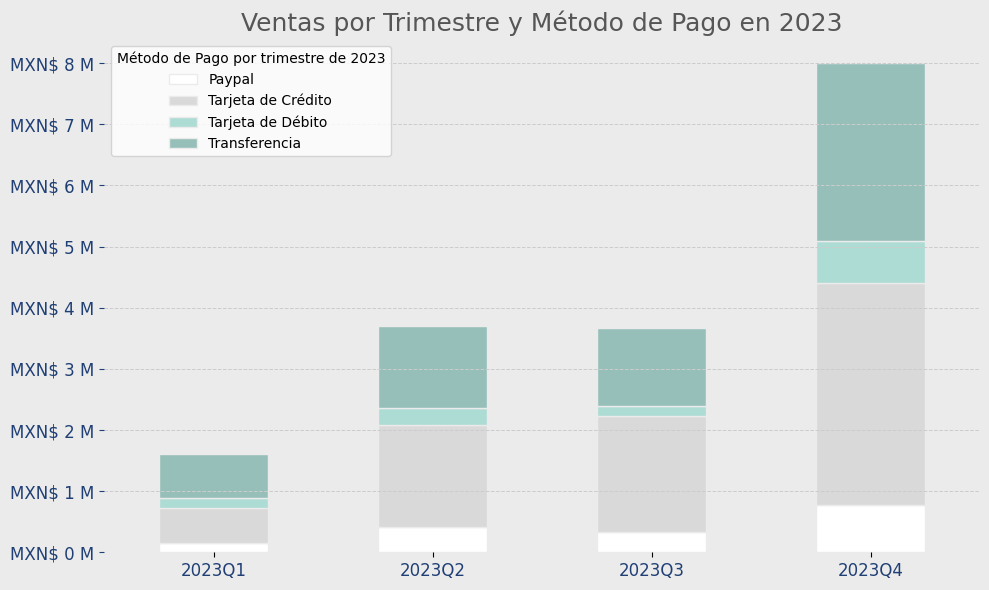

In [71]:
ventas_por_trimestre().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
plt.figure(figsize=(6, 6))
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%',
        colors=['#FF6666', '#66b3ff'], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.4})

# 3. A√±adir t√≠tulo
plt.title('Proporci√≥n de Usuarios Participando en el Programa de Cashback', fontsize=16)

# 4. Mostrar el gr√°fico
plt.axis('equal')  # Asegura que el gr√°fico sea un c√≠rculo
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [72]:
def proporcion_cashback():
  colores=[GRIS_3,AZUL_1]
  colores_rev=[AZUL_1,GRIS_3]
  # Crear gr√°fico tipo rosquilla
  fig, ax = plt.subplots(figsize=(6, 6), facecolor=GRIS_1)
  ax.set_facecolor(GRIS_1)

  wedges, texts, autotexts = ax.pie(
      conteo_cashback,
      labels=conteo_cashback.index,
      autopct='%1.1f%%',
      colors=colores,
      startangle=180,
      pctdistance=0.8,
      wedgeprops={'width': 0.4}
  )

  # Estilizar etiquetas y porcentajes
  for i, (text, autotext) in enumerate(zip(texts, autotexts)):
      text.set_color(AZUL_1)
      text.set_fontsize(12)
      autotext.set_color(colores_rev[i])
      autotext.set_fontsize(12)

  # T√≠tulo con formato solicitado
  ax.set_title('¬øParticipan en el programa de cashback?', fontsize=18, color=GRIS_4)

  # Mantener forma circular
  ax.axis('equal')

  plt.tight_layout()
  return plt

In [73]:
proporcion_cashback().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de distribuci√≥n (histograma)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de las Calificaciones de las Compras', fontsize=16)
plt.xlabel('Calificaci√≥n (0-10)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a a√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [74]:
def distribucion_calificaciones():
  # 1. Configurar la figura y el fondo
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)
  ax.set_facecolor(GRIS_1)

  # 2. Crear histograma con color ROJO_1
  sns.histplot(df['nota'], bins=11, kde=False, color=ROJO_1, ax=ax)

  # 3. T√≠tulo y etiquetas con formato
  ax.set_title('Distribuci√≥n de las evaluaciones de las compras en 2023',
              fontsize=18, color=GRIS_5)
  ax.set_xlabel('Calificaci√≥n (0-10)', fontsize=12, color=AZUL_1)
  ax.set_ylabel('Frecuencia', fontsize=12, color=AZUL_1)

  # 4. Personalizar ticks
  ax.set_xticks(range(11))
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # 5. Quitar bordes del gr√°fico
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # 6. Grid detr√°s de las barras
  ax.set_axisbelow(True)
  ax.grid(axis='y', color=GRIS_3, linestyle='--', linewidth=0.5)

  # 7. Crear anotaci√≥n personalizada
  texto_anotacion = (
      f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n"
      f"Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n"
      f"Frecuencia de la m√°s com√∫n = {df['nota'].value_counts().max()}"
  )

  ax.annotate(
      texto_anotacion,
      xy=(8.7, 2250),            # punto al que apunta la flecha
      xytext=(2, 1800),          # posici√≥n de la caja de texto
      fontsize=12,
      color=AZUL_1,
      arrowprops=dict(facecolor=AZUL_1, arrowstyle='->', connectionstyle="arc3,rad=0.3"),
      bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=GRIS_3)
  )

  plt.tight_layout()
  return plt

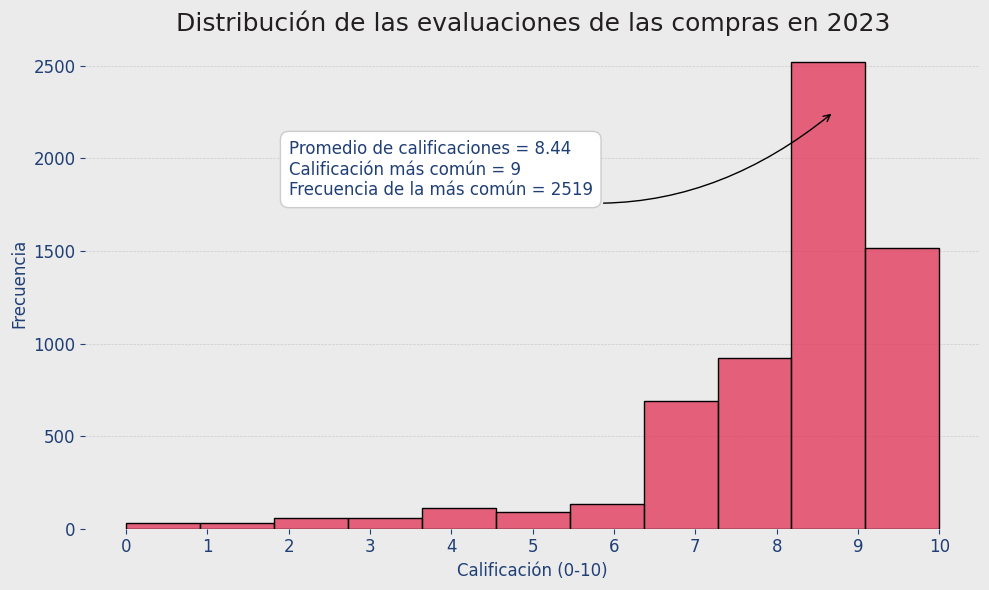

In [75]:
distribucion_calificaciones().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de boxplot
sns.boxplot(x='sexo_biologico', y='edad', data=df, palette='Set2')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [76]:
def boxplt_edad_sexo():
  # 1. Configurar la figura y el fondo
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)
  ax.set_facecolor(GRIS_1)

  # 2. Crear boxplot con paleta [AZUL_1, AQUA_1]
  sns.boxplot(
      x='sexo_biologico',
      y='edad',
      data=df,
      palette=[AZUL_1, AQUA_1],
      ax=ax)

  # 3. T√≠tulo y etiquetas
  ax.set_title('Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes',
              fontsize=18, color=GRIS_5)
  ax.set_xlabel('')  # Suprimir etiqueta del eje x
  ax.set_ylabel('Edad', fontsize=12, color=AZUL_1)

  # 4. Estilizar ticks
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # 5. Eliminar bordes
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # 6. Grid detr√°s del gr√°fico
  ax.set_axisbelow(True)
  ax.grid(axis='y', color=GRIS_3, linestyle='--', linewidth=0.5)

  # 7. Anotaciones con estad√≠sticas por sexo biol√≥gico
  grupo = df.groupby("sexo_biologico")["edad"]

  # Femenino (√≠ndice 1)
  texto_fem = (
      f"M√≠nimo = {grupo.min()[1]}\n"
      f"1¬∫ quartil = {grupo.quantile(.25)[1]}\n"
      f"2¬∫ quartil = {grupo.median()[1]}\n"
      f"3¬∫ quartil = {grupo.quantile(.75)[1]}\n"
      f"M√°ximo = {grupo.max()[1]}")
  ax.annotate(
      texto_fem,
      xy=(-0.1, 45), xytext=(-0.4, 50),
      fontsize=12,
      color=AZUL_1,
      arrowprops=dict(facecolor=AZUL_1, arrowstyle='->'),
      bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=GRIS_3))

  # Masculino (√≠ndice 0)
  texto_masc = (
      f"M√≠nimo = {grupo.min()[0]}\n"
      f"1¬∫ quartil = {grupo.quantile(.25)[0]}\n"
      f"2¬∫ quartil = {grupo.median()[0]}\n"
      f"3¬∫ quartil = {grupo.quantile(.75)[0]}\n"
      f"M√°ximo = {grupo.max()[0]}")
  ax.annotate(
      texto_masc,
      xy=(0.9, 45), xytext=(0.6, 50),
      fontsize=12,
      color=AZUL_1,
      arrowprops=dict(facecolor=AZUL_1, arrowstyle='->'),
      bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=GRIS_3))

  plt.tight_layout()
  return plt


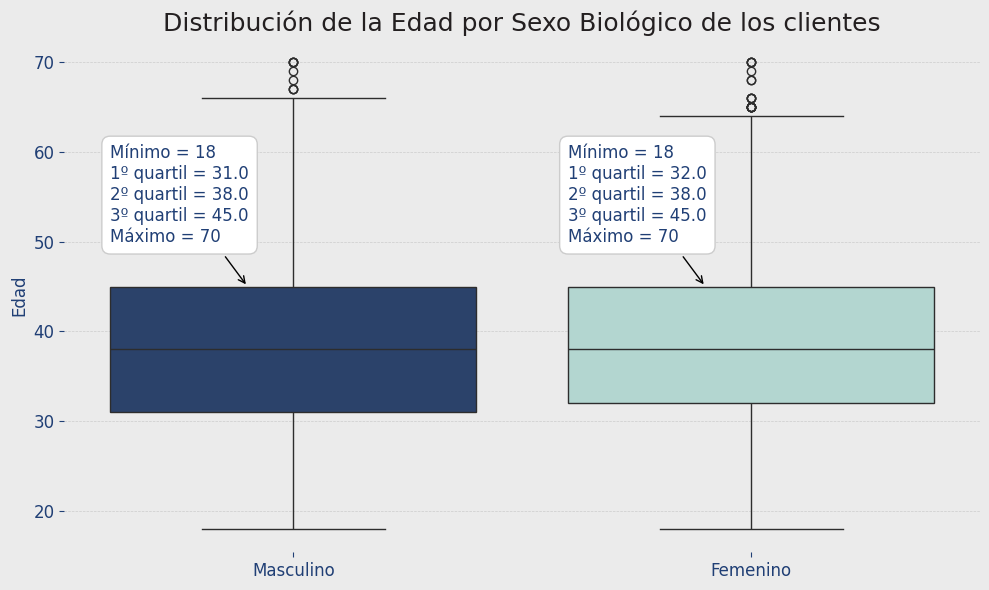

In [77]:
boxplt_edad_sexo().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_mensuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

In [78]:
def exportar_grafico(grafico,nombre):
  imagen=grafico()
  imagen.savefig(f'{nombre}.png', bbox_inches='tight')
  imagen.close()

exportar_grafico(metodo_pago, 'grafico_metodo_pago')
exportar_grafico(ventas_totales, 'grafico_ventas_totales')
exportar_grafico(facturacion_por_categoria, 'grafico_facturacion_por_categoria')
exportar_grafico(ventas_por_trimestre, 'grafico_ventas_por_trimestre')
exportar_grafico(proporcion_cashback, 'grafico_proporcion_cashback')
exportar_grafico(distribucion_calificaciones,'grafico_distribucion_calificaciones')
exportar_grafico(boxplt_edad_sexo,'grafico_boxplt_edad_sexo')

¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!

# Enlace a la presentaci√≥n elaborada en Gamma

https://gamma.app/docs/Analisis-Comercial-y-Perfil-de-Clientes-de-Zoop-2023-gpjc95zgesbg8hv

En ese enlace podr√°s visualizar la presentaci√≥n que elabor√© colocando los gr√°ficos aqu√≠ generados.

Esta p√°gina tiene la cualidad de generar presentaciones con ayuda de la inteligencia artificial.